# SDS Kaggle salary estimation project - 2025
### Data retrival and cleaning
source: https://www.kaggle.com/datasets/chopper53/machine-learning-engineer-salary-in-2024/data

##  Data summary
- 2 col del : ['salary','salary_currency']   (16494, 11) -> (16494, 9)
- duplicates dropped: (16494, 9) -> (10092, 9)
- change column order: salary_in_usd at the end

In [ ]:
# pip install kagglehub

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


## Download data and save localy. (change markdown to code)
import kagglehub  
import os

path = kagglehub.dataset_download("chopper53/machine-learning-engineer-salary-in-2024")  
print(os.listdir(path))

file = path+'/'+os.listdir(path)[0]

pd.read_csv(file).to_csv('salary.csv')

In [27]:
df = pd.read_csv('salary.csv', index_col=[0])
df.shape

(16494, 11)

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df[:3]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M


In [28]:
df.drop(['salary','salary_currency'], axis=1, inplace=True)
df.shape

(16494, 9)

In [10]:
# Check for missing datapoint
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [32]:
# Check for duplicates
df.loc[df.duplicated(keep='first')].shape

(6402, 9)

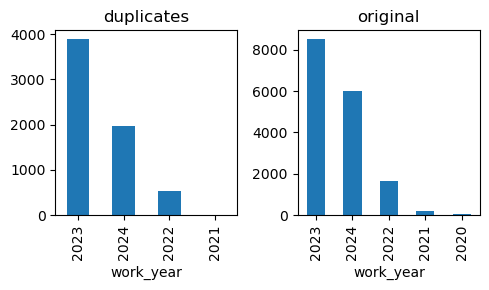

In [14]:
fig, ax = plt.subplots(1,2, figsize=(5,3))
df.loc[df.duplicated(keep='first'), 'work_year'].value_counts().plot(kind='bar', ax=ax[0], title='duplicates')
df.work_year.value_counts().plot(kind='bar',ax=ax[1], title='original')

plt.tight_layout()
plt.show()

In [38]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(10092, 9)

In [41]:
df.reset_index(drop=True, inplace=True)

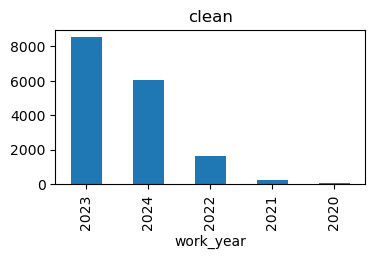

In [14]:
df.work_year.value_counts().plot(kind='bar', title='clean', figsize=(4,2));

In [47]:
df = df[['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'salary_in_usd']]

In [49]:
df.to_csv('salary_clean.csv')